In [1]:
import pandas as pd
df_flight = pd.read_csv('df_final_filtered.csv')

###### XGBoost

In [2]:
df_flight.columns

Index(['Unnamed: 0', 'weekday', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
       'crs_dep_time', 'crs_arr_time', 'actual_elapsed_time', 'air_time',
       'distance', 'origin_airport_id', 'dest_airport_id'],
      dtype='object')

In [3]:
df_flight.columns.to_series().groupby(df_flight.dtypes).groups

{dtype('int64'): Index(['Unnamed: 0', 'weekday', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
        'crs_dep_time', 'crs_arr_time', 'origin_airport_id', 'dest_airport_id'],
       dtype='object'),
 dtype('float64'): Index(['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
        'actual_elapsed_time', 'air_time', 'distance'],
       dtype='object')}

In [4]:
 #df_flight = df_flight[['mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', \
 #                       'crs_arr_time', 'crs_elapsed_time','distance', 'arr_delay', 'weekday']]

In [5]:
df_flight.shape

(296648, 16)

In [6]:
df_flight = df_flight.drop(['dep_delay', 'taxi_out', 'taxi_in', 'actual_elapsed_time', 'air_time'], axis = 1)

In [7]:
df_flight = df_flight.drop(['Unnamed: 0', 'weekday'], axis = 1)

In [8]:
df_flight.shape

(296648, 9)

In [9]:
df_flight.describe()

,mkt_unique_carrier,mkt_carrier_fl_num,arr_delay,crs_elapsed_time,crs_dep_time,crs_arr_time,distance,origin_airport_id,dest_airport_id
count,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000
mean,4.214584,2724.782038,1.284549,137.849411,1332.244967,1484.501618,759.353678,12673.373234,12669.004180
std,3.545654,1807.789330,47.293846,70.042401,491.802791,520.601242,573.713154,1525.282000,1523.789424
min,0.000000,1.000000,-68.000000,19.000000,5.000000,1.000000,31.000000,10135.000000,10135.000000
25%,0.000000,1159.000000,-16.000000,88.000000,917.000000,1101.000000,342.000000,11292.000000,11292.000000
50%,3.000000,2381.000000,-8.000000,120.000000,1325.000000,1515.000000,602.000000,12889.000000,12889.000000
75%,8.000000,4167.000000,3.000000,166.000000,1736.000000,1919.000000,990.000000,14057.000000,14057.000000
max,9.000000,9343.000000,1910.000000,690.000000,2359.000000,2400.000000,5095.000000,16869.000000,16869.000000


In [10]:
X = df_flight.drop(['arr_delay'], axis=1)
X.shape

(296648, 8)

In [11]:
y = df_flight['arr_delay']

In [12]:
y.shape

(296648,)

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=42)

In [15]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
import numpy as np

In [18]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)

In [19]:
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

In [20]:
# Compute RMSE
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE is {:.2f}".format(rmse_baseline))

Baseline RMSE is 48.25


In [21]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [22]:
params['eval_metric'] = "rmse"

In [23]:
num_boost_round = 999

In [24]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:48.16791
[1]	Test-rmse:48.11553
[2]	Test-rmse:48.08458
[3]	Test-rmse:48.04057
[4]	Test-rmse:48.02132
[5]	Test-rmse:47.98193
[6]	Test-rmse:47.96070
[7]	Test-rmse:47.94619
[8]	Test-rmse:47.92211
[9]	Test-rmse:47.91648
[10]	Test-rmse:47.90229
[11]	Test-rmse:47.89299
[12]	Test-rmse:47.88561
[13]	Test-rmse:47.88354
[14]	Test-rmse:47.88248
[15]	Test-rmse:47.88219
[16]	Test-rmse:47.88258
[17]	Test-rmse:47.88807
[18]	Test-rmse:47.87606
[19]	Test-rmse:47.87868
[20]	Test-rmse:47.87607
[21]	Test-rmse:47.87073
[22]	Test-rmse:47.87242
[23]	Test-rmse:47.88034
[24]	Test-rmse:47.87823
[25]	Test-rmse:47.88150
[26]	Test-rmse:47.88448
[27]	Test-rmse:47.85974
[28]	Test-rmse:47.85905
[29]	Test-rmse:47.86127
[30]	Test-rmse:47.86693
[31]	Test-rmse:47.86996
[32]	Test-rmse:47.87197
[33]	Test-rmse:47.87167
[34]	Test-rmse:47.88476
[35]	Test-rmse:47.89209
[36]	Test-rmse:47.89498
[37]	Test-rmse:47.89362


In [25]:
# Saving your model
# Although we found the best number of rounds, our model has been trained with more rounds than optimal, 
# thus before using it for predictions, we should retrain it with the good number of rounds. 
# Since we now the exact best num_boost_round, we don't need the early_stopping_round anymore.
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:48.16791
[1]	Test-rmse:48.11553
[2]	Test-rmse:48.08458
[3]	Test-rmse:48.04057
[4]	Test-rmse:48.02132
[5]	Test-rmse:47.98193
[6]	Test-rmse:47.96070
[7]	Test-rmse:47.94619
[8]	Test-rmse:47.92211
[9]	Test-rmse:47.91648
[10]	Test-rmse:47.90229
[11]	Test-rmse:47.89299
[12]	Test-rmse:47.88561
[13]	Test-rmse:47.88354
[14]	Test-rmse:47.88248
[15]	Test-rmse:47.88219
[16]	Test-rmse:47.88258
[17]	Test-rmse:47.88807
[18]	Test-rmse:47.87606
[19]	Test-rmse:47.87868
[20]	Test-rmse:47.87607
[21]	Test-rmse:47.87073
[22]	Test-rmse:47.87242
[23]	Test-rmse:47.88034
[24]	Test-rmse:47.87823
[25]	Test-rmse:47.88150
[26]	Test-rmse:47.88448
[27]	Test-rmse:47.85974
[28]	Test-rmse:47.85905


In [26]:
# All good, now let’s use our model to make predictions. We will use the test dataset and compute MAE with the scikit-learn function. 
# We should obtain the same score as promised in the last round of training, let’s check!
mean_absolute_error(best_model.predict(dtest), y_test)

21.02989944713917

In [27]:
np.sqrt(mean_squared_error(best_model.predict(dtest), y_test))

47.85903241273828

In [28]:
r2 = r2_score(y_test, best_model.predict(dtest))
r2

0.016211647412547325

In [29]:
# save model to a file, here is how you can do it with XGBoost:
best_model.save_model("my_xgb_model.model")

In [30]:
# You can then load the model later with:
loaded_model = xgb.Booster()
loaded_model.load_model("my_xgb_model.model")

# And use it for predictions.
predicts = loaded_model.predict(dtest)
predicts

array([12.651046, -6.203861,  4.589657, ..., 12.863008, -4.814479,
        4.948316], dtype=float32)

In [31]:
r2 = r2_score(y_test, predicts)
r2

0.016211647412547325

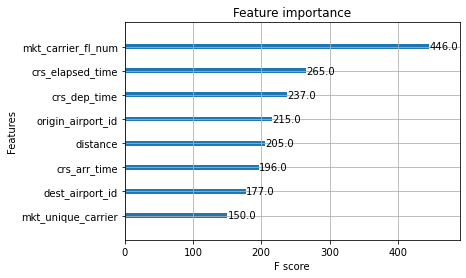

In [32]:
# Examine the importance of each feature column in the original dataset within the model.
# One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, 
# and then visualizing the result as a bar graph, with the features ordered according to how many times they appear
from matplotlib import pyplot as plt
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [33]:
df_flight.columns

Index(['mkt_unique_carrier', 'mkt_carrier_fl_num', 'arr_delay',
       'crs_elapsed_time', 'crs_dep_time', 'crs_arr_time', 'distance',
       'origin_airport_id', 'dest_airport_id'],
      dtype='object')